In [1]:
import csv
from hypothesis_test import *
from graph_distributions import *

In [2]:
# Data preprocessing
file = open(r"Datasets/compas-scores.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

battery_ids = [int(id[x]) for x in range(len(id)) if c_charge_desc[x] == 'Battery']
battery_races = [race[x-1] for x in battery_ids]
battery_scores = [score_text[x-1] for x in battery_ids]

possession_ids = [int(id[x]) for x in range(len(id)) if ('Possession' in c_charge_desc[x]) and 
                  (not "Aggravated" in c_charge_desc[x])]
possession_races = [race[x-1] for x in possession_ids]
possession_scores = [score_text[x-1] for x in possession_ids]

Null hypothesis (proposed distribution): [0.054285714285714284, 0.14857142857142858, 0.7971428571428572]

Proposed distribution rejected at alpha = 0.05. Kardis = 9.22518103688553e-34.
Any plausible distribution must boost probability over the given distribution by 5.41994783626276e+31, and will therefore have a minimum probability of 1.47800594171187e-8.
Closest plausible distribution: [0.10337422587867007, 0.2199232335023806, 0.6767025406189493]


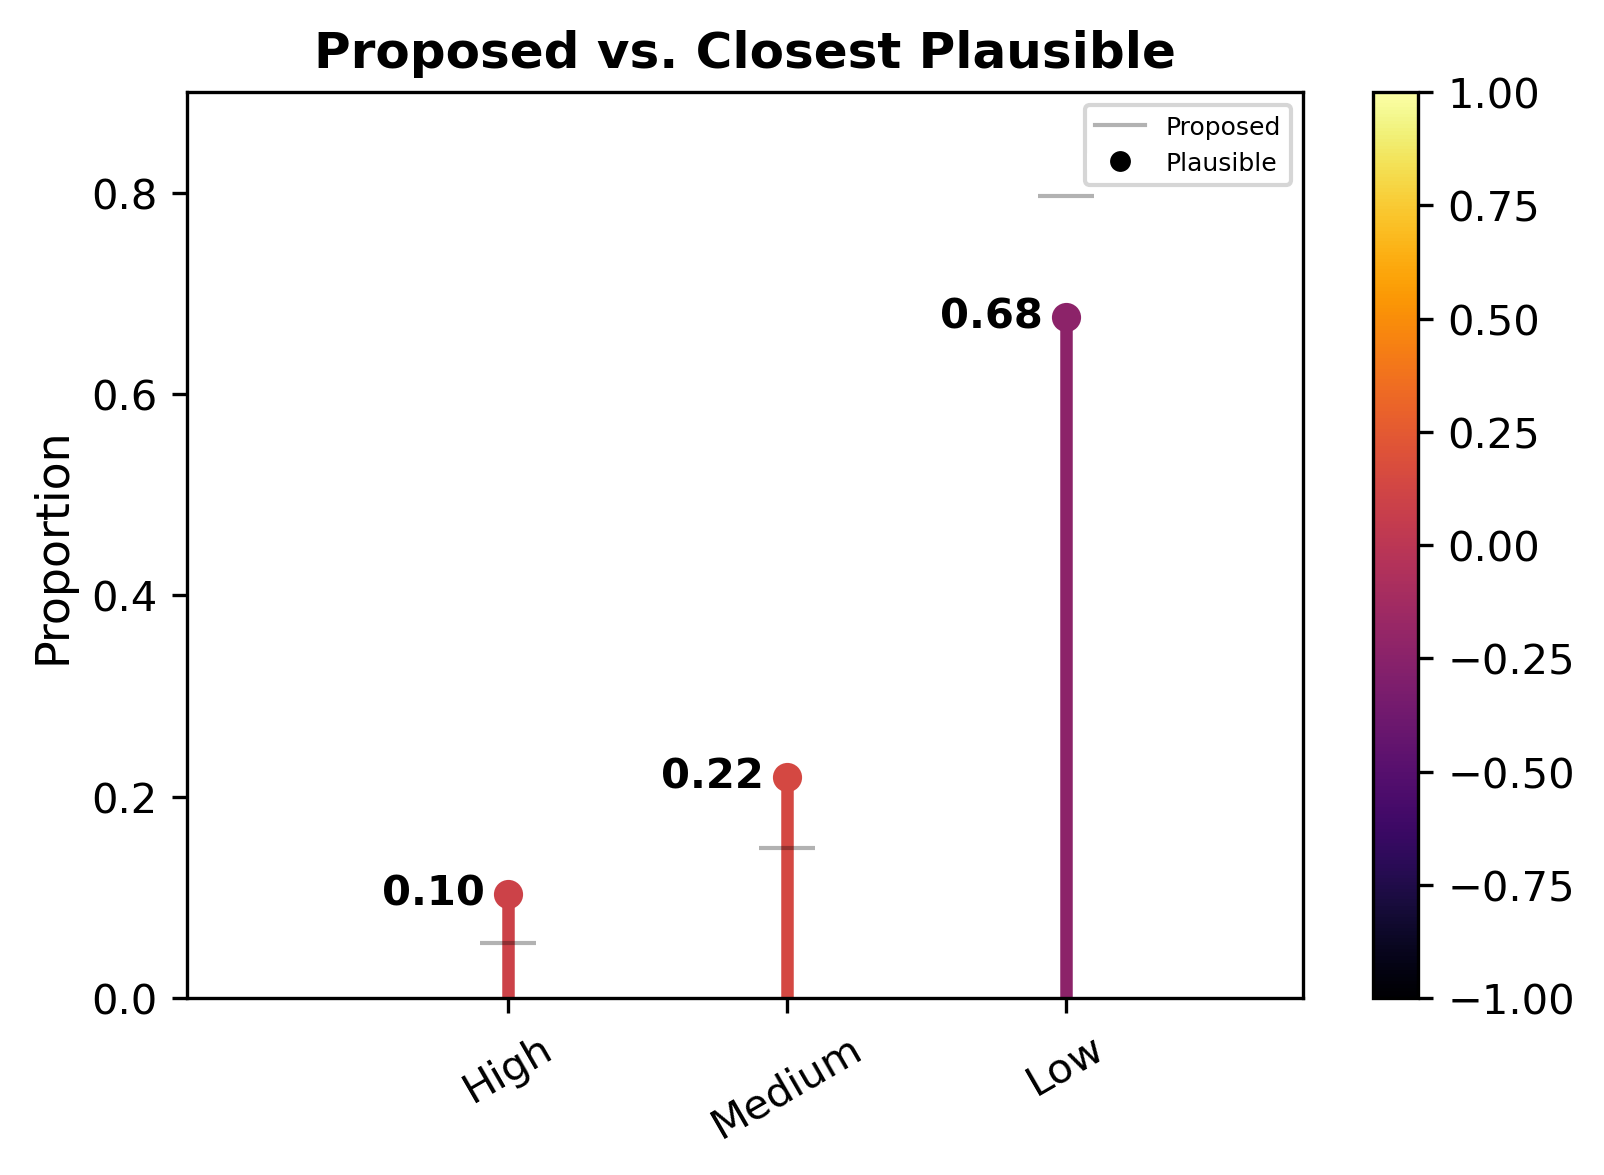

In [3]:
# Battery Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(battery_races,battery_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]

AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_battery_white_dist.pdf")

Null hypothesis (proposed distribution): [0.15613382899628253, 0.2620817843866171, 0.5817843866171004]

Proposed distribution rejected at alpha = 0.05. Kardis = 4.90871099789229e-44.
Any plausible distribution must boost probability over the given distribution by 1.01859734707277e+42, and will therefore have a minimum probability of 4.22861485827189e-8.
Closest plausible distribution: [0.31414373111476385, 0.28256766740718725, 0.40328860147804885]


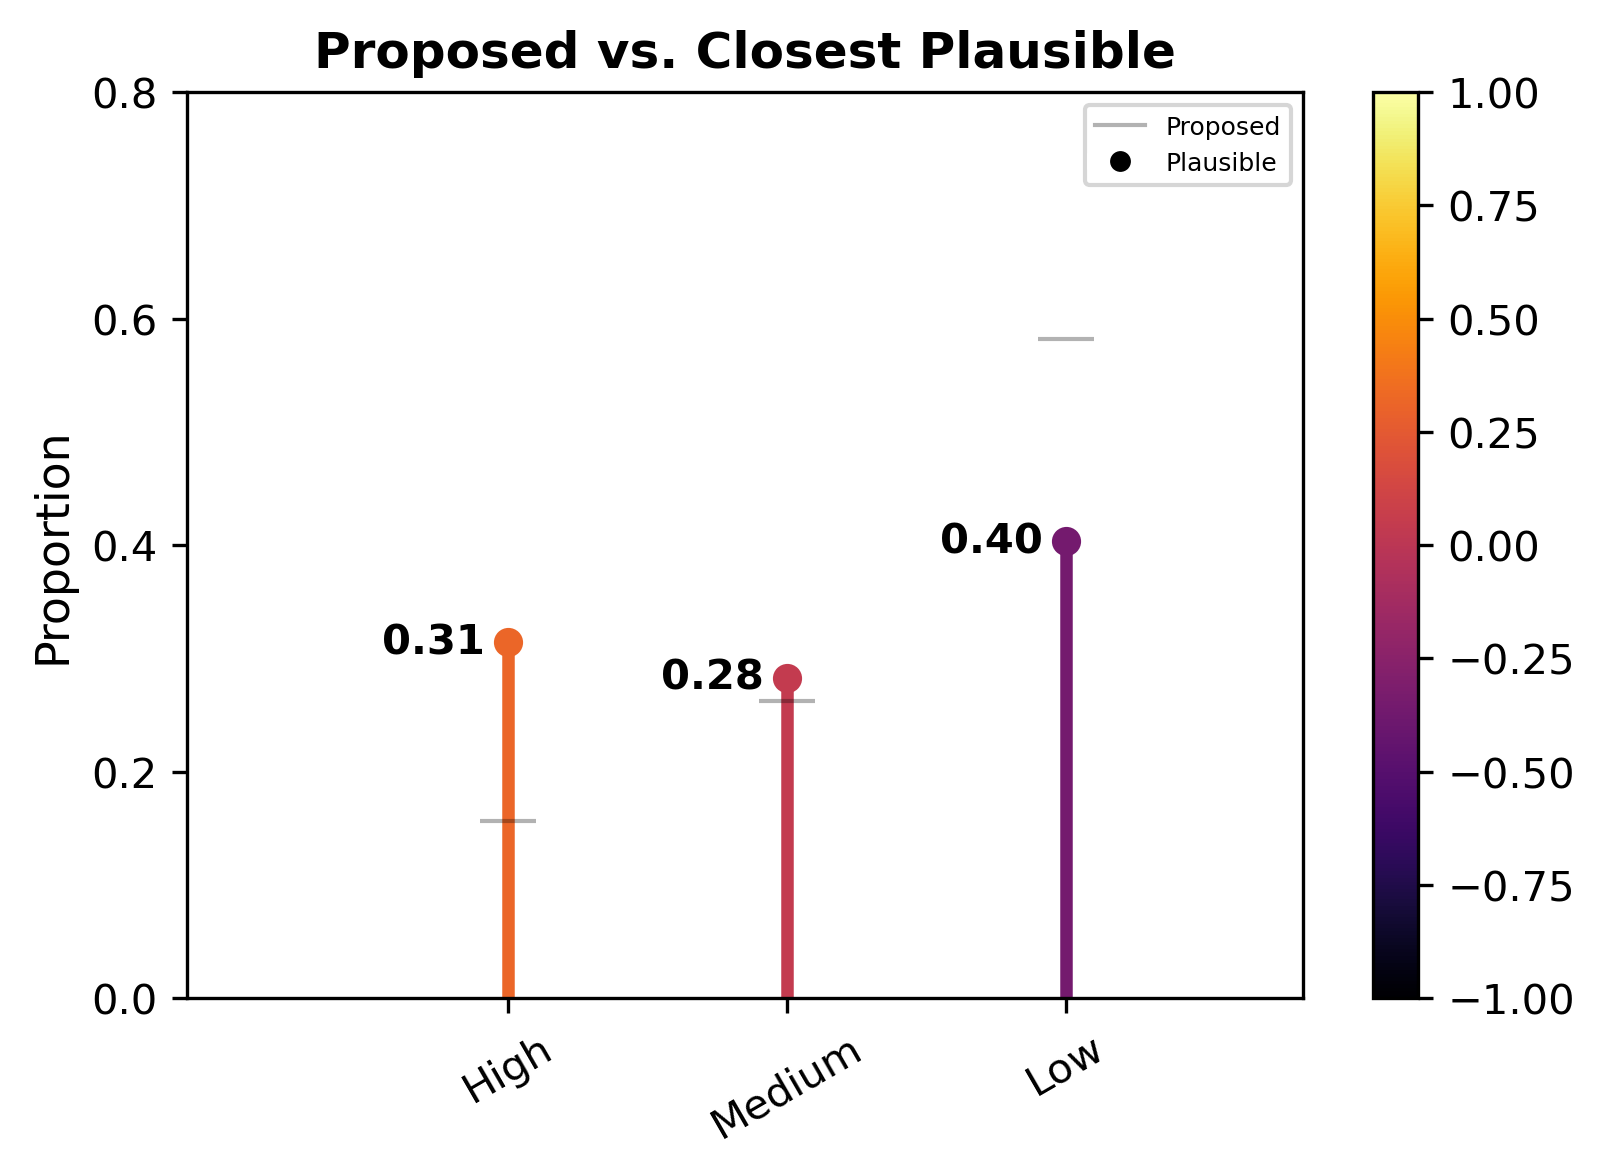

In [4]:
# Possession Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(possession_races,possession_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_possession_white_dist.pdf")